# 1. 선형/비선형 여부는 독립 변수가 한 개인지 여러개인지에 따라 나뉜다.
## (O/X 문제, 답에 대한 이유를 적으시오)


X \n
회귀 계수의 선형 여부에 따라 선형/비선형 여부를 나눔. \n
독립 변수 한 개 : 단일 회귀, 독립 변수 두 개 : 다중 회귀

# 2. RSS 에 간략하게 적으시오

RSS(Residual Sum of Square) : 오류 값(실제 값과 회귀 모델의 차이)의 제곱을 구해서 더하는 방식


# 3. RSS는 회귀식의 독립변수 X, 종속변수Y 가 중심변수이다.
## (O/X 문제, 답에 대한 이유를 적으시오)

X \n
회귀 계수가 중심 변수

# 4. 최적의 회귀 모델을 만든다는 것의 의미를 적으시오

오류 값 합이 최소가 되는 모델을 만드는 것 \n
오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는 것

# 5. 머신러닝 회귀 예측의 핵심은?

주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것

# 6. 경사 하강법의 핵심과 원리를 간략하게 적으시오

어떻게 하면 오류가 작아지는 방향으로 회귀 계수를 보정할 수 있을까? \n
1. 임의의 회귀 계수를 설정하고 첫 비용 함수 값 계산 \n
2. 위의 결과 값을 통해 회귀 계수의 값을 업데이트하고 다시 비용 함수 값 계산 \n
3. 비용 함수 값이 더 이상 감소하지 않을 때가지 반복 후, 비용 함수 값이 감소하지 않으면 중지. 

# 7. 다중공선성 문제의 정의와 해결방법을 적으시오

피처간의 상관관계가 매우 높은 경우 분산이 매우 커져 오류에 민감해지는 문제 \n
일반적으로 독립적인 중요 피처만 남기고 제거하거나 규제(Regularization) 적용 \n
매우 많은 피처가 다중 공선성 문제를 가지고 있다면 PCA를 통해 차원 축소

# 8. 회귀 평가 지표 4가지를 간략하게 적으시오

MAE : 실제 값과 예측값 차이 절대값의 평균 \n
MSE : 실제 값과 예측값 차이 제곱의 평균 \n
RMSE : MSE에 루트를 씌운 것 \n
R^2 : 예측값 분산/실제 값 분산

# 9. neg_mean_absolute_error 가 음수값을 반환하는 이유를 적으시오.

사이킷런의 Scoring 함수가 score값이 클수록 좋은 평가 결과로 평가. MAE는 값이 클수록 나쁜 모델을 의미하므로 -1을 곱해 음수를 만들어 숫자를 작게 만들기위해

# 10. 차수와 편향과 분산, 과소적합, 과적합들의 관계를 적으시오

차수(degree)를 높일수록 학습데이터에만 맞춰진 학습이 이뤄져 과적합 문제 발생, 지나치게 높은 변동성(고분산) \n
차수를 낮출수록 예측 곡선이 학습 데이터의 패턴을 제대로 반영하지 못해 과소적합 문제 발생, 지나치게 한 방향성으로 치우침(고편향) \n
고편향/저분산에서 과소적합되기 쉽고, 저편향/고분산에서 과적합되기 쉽다

# 11. 회귀 계수의 크기를 제어하고 RSS 최소화 방법을 사용하는 비용함수의 목표를 적으시오

RSS+alpha*회귀 계수를 최소화하는 회귀 계수 벡터를 찾는 것

# 12. 릿지 회귀는 alpha 값이 커질수록 회귀 계수를 작게 만든다.
## (O/X 문제, 답에 대한 이유를 적으시오)

O \n
alpha가 증가할수록 비용 함수 식은 RSS에 비해 alpha*회귀 계수가 매우 커지므로 비용 함수 목표를 달성하기 위해 회귀 계수를 작게 만든다

# 13. 로지스틱 함수는 선형 회귀방식을 따르고 회귀 최적선을 찾는다.
## (O/X 문제, 답에 대한 이유를 적으시오)

X \n
Sigmoid 함수 최적선을 찾고 이 Sigmoid 함수의 반환 값을 확률로 간주해 확률에 따라 분류를 결정 \n
Sigmoid 함수를 이용하면 좀 더 정확하게 0과 1에 대해 분류 할 수 있다

# 14. 중고차 가격 예측 회귀 실습 (밑의 순서대로 진행할것)


## 1. 데이터 전처리

In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

car_df=pd.read_csv('./used_car_train-data.csv')
car_df.head(3)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50


In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


### (1) Year를 datetime 형식으로 변환하기

### (2) 'Unnamed: 0','New_Price', 'Transmission', 'Engine', 'Seats', 'Power' 칼럼 삭제하기

In [7]:
car_df.drop(['Unnamed: 0', 'New_Price', 'Transmission', 'Engine', 'Seats', 'Power'], axis=1, inplace=True)

In [8]:
car_df.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,First,26.6 km/kg,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,First,19.67 kmpl,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,First,18.2 kmpl,4.50


In [9]:
names = list(car_df['Name'])
mileage = list(car_df['Mileage'])

for i in range(len(names)):
    names[i]=names[i].split(' ', 1)[0]
car_df['Name']=names

for i in range(len(mileage)):
    mileage[i]=str(mileage[i]).split(' ')[0]
car_df['Mileage']=mileage

car_df.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Price
0,Maruti,Mumbai,2010,72000,CNG,First,26.6,1.75
1,Hyundai,Pune,2015,41000,Diesel,First,19.67,12.50
2,Honda,Chennai,2011,46000,Petrol,First,18.2,4.50


### (3) Price, Kilometers_Driven, Mileage float 형으로 변환하기

In [10]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6019 non-null   object 
 7   Price              6019 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 376.3+ KB


In [16]:
car_df = car_df.astype({'Price':float, 'Kilometers_Driven':float,'Mileage':float})

In [17]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   float64
 4   Fuel_Type          6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6017 non-null   float64
 7   Price              6019 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 376.3+ KB


### (4) null 값 없애기

In [19]:
car_df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Owner_Type           0
Mileage              2
Price                0
dtype: int64

In [20]:
car_df['Mileage']= car_df['Mileage'].fillna(car_df['Mileage'].mean())

In [21]:
car_df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Owner_Type           0
Mileage              0
Price                0
dtype: int64

### (5)get_dummise를 이용해서 'Year', 'Name','Location', 'Fuel_Type', 'Owner_Type' 인코딩하기

In [25]:
from sklearn.model_selection import train_test_split , GridSearchCV

y_target = car_df['Price']
X_features = car_df.drop(['Price'], axis=1)

X_features_ohe = pd.get_dummies(X_features, columns=['Year','Name','Location','Fuel_Type','Owner_Type'])

In [26]:
X_features_ohe

,Kilometers_Driven,Mileage,Year_1998,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,...,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,72000.0,26.60,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,41000.0,19.67,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,46000.0,18.20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,87000.0,20.77,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,40670.0,15.20,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,27365.0,28.40,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6015,100000.0,24.40,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6016,55000.0,14.00,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6017,46000.0,18.90,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


## 2. 사이킷런의 LinearRegression 객체를 이용해서 회귀 예측하기

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target, test_size=0.3, random_state=0)

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print('MAE : {0:.3f}, MSE : {1:.3f}, RMSE : {2:.3f}'.format(mae, mse, rmse))

MAE : 3.479, MSE : 44.946, RMSE : 6.704


In [39]:
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
neg_mse_scores = cross_val_score(lr, X_features_ohe, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(np.round(neg_mse_scores, 2))
print(np.round(rmse_scores, 2))
print(np.round(avg_rmse, 2))

[-34.25 -52.4  -29.27 -41.19 -42.91]
[5.85 7.24 5.41 6.42 6.55]
6.29


## 3. Target 값인 Price가 정규 분포를 이루는지 확인하기 왜곡되어 있다면, 로그를 적용해서 변환해주기

<AxesSubplot:>

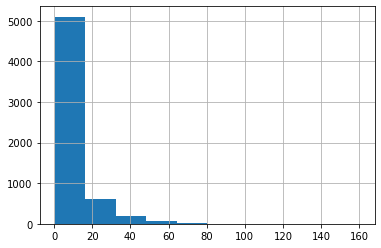

In [40]:
y_target.hist()

<AxesSubplot:>

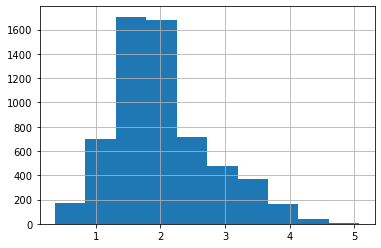

In [42]:
y_target_log = np.log1p(y_target)
y_target_log.hist()

## 4. 변환한 값을 가지고 다시 사이킷런의 LinearRegression, Ridge, Lasso 객체들를 이용해서 학습학하고 예측 성능 확인하기

In [47]:
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mae_val = mean_absolute_error(y,pred)
    print('MAE: {0:.3f}, RMSE: {1:.3F}, RMSLE: {2:.3F}'.format(mae_val, rmse_val, rmsle_val))

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)


def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
  


lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
MAE: 2.545, RMSE: 6.272, RMSLE: 0.291
### Ridge ###
MAE: 2.582, RMSE: 6.287, RMSLE: 0.295
### Lasso ###
MAE: 3.636, RMSE: 8.111, RMSLE: 0.426


## 5. 변환한 값을 가지고 회귀 트리인 랜덤 포레스트, GBM, XGBoost, LightGBM을 순차적으로 성능 평가해보기

In [49]:

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    get_model_predict(model,X_train.values, X_test.values, y_train.values, y_test.values,is_expm1=True)

### RandomForestRegressor ###
MAE: 2.430, RMSE: 6.233, RMSLE: 0.293
### GradientBoostingRegressor ###
MAE: 2.186, RMSE: 5.658, RMSLE: 0.259
### XGBRegressor ###
MAE: 1.971, RMSE: 5.263, RMSLE: 0.233
### LGBMRegressor ###
MAE: 2.179, RMSE: 5.601, RMSLE: 0.250
